In [1]:
import geopandas as gpd
mesh = gpd.read_file('../.data/citymesh.geojson')
mesh.head()

OBJECTID  Total_Exis                                           geometry
0         1           1  POLYGON ((-13654625.45737612 5689525.931444315...
1         2           0  POLYGON ((-13654517.08877435 5689528.840540393...
2         3           0  POLYGON ((-13654408.72010272 5689531.74832728,...
3         4           1  POLYGON ((-13654300.35136125 5689534.654804969...
4         5           0  POLYGON ((-13654191.98255 5689537.559973462, -...

In [2]:
mesh.plot(figsize=(15,15))

## Filtering the mesh by attached number of housing units

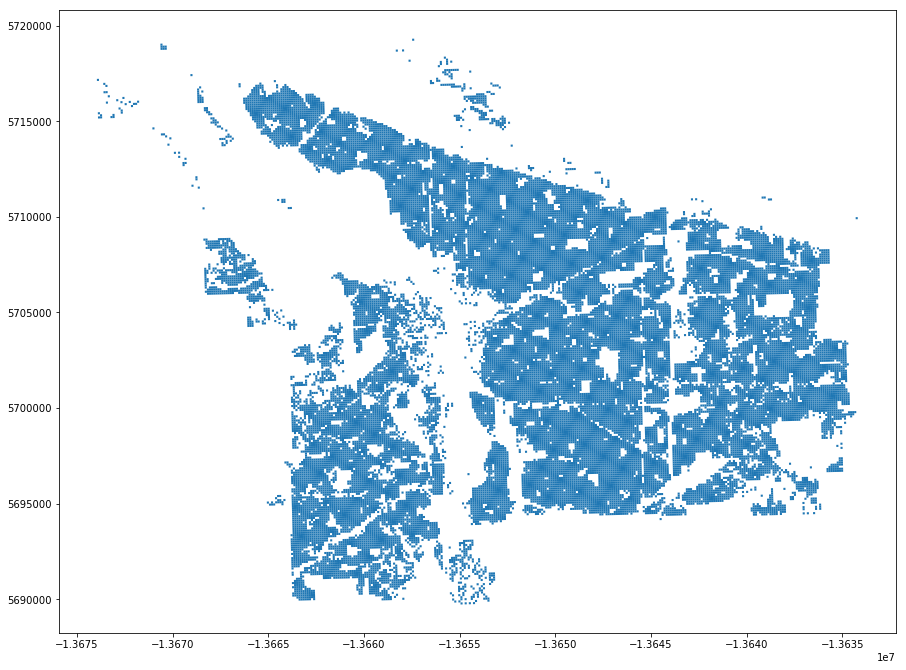

In [4]:
keep = mesh[mesh['Total_Exis'] > 1]
keep.plot(figsize=(15,15))

In [5]:
keep.to_file('../.data/mesh_1.geojson', driver='GeoJSON')

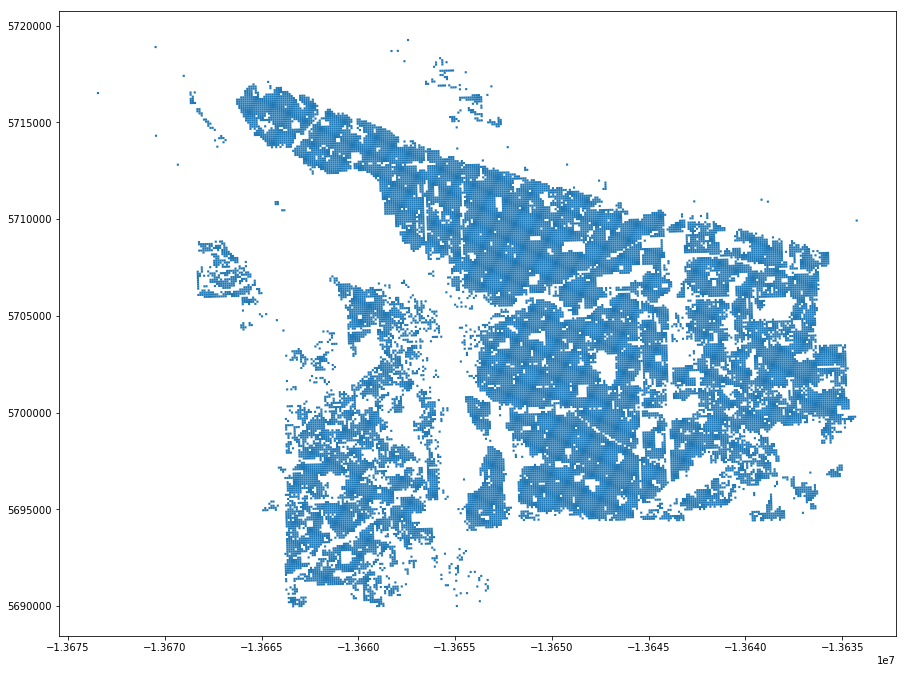

In [6]:
keep = mesh[mesh['Total_Exis'] > 2]
keep.plot(figsize=(15,15))

In [7]:
keep.to_file('../.data/mesh_2.geojson', driver='GeoJSON')

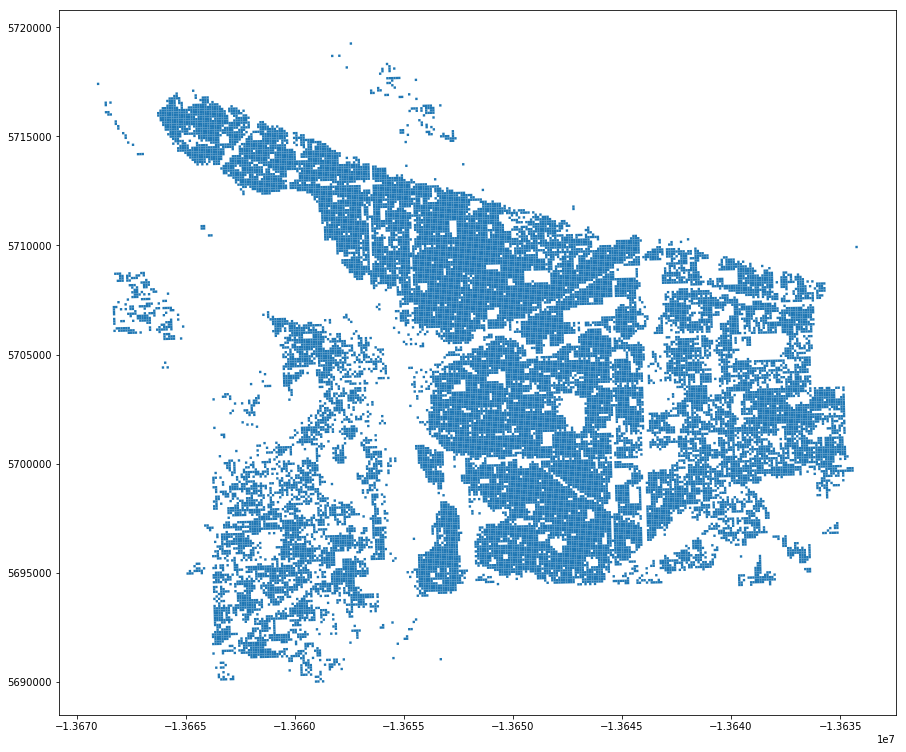

In [8]:
keep = mesh[mesh['Total_Exis'] > 3]
keep.plot(figsize=(15,15))

In [9]:
keep.to_file('../.data/mesh_3.geojson', driver='GeoJSON')

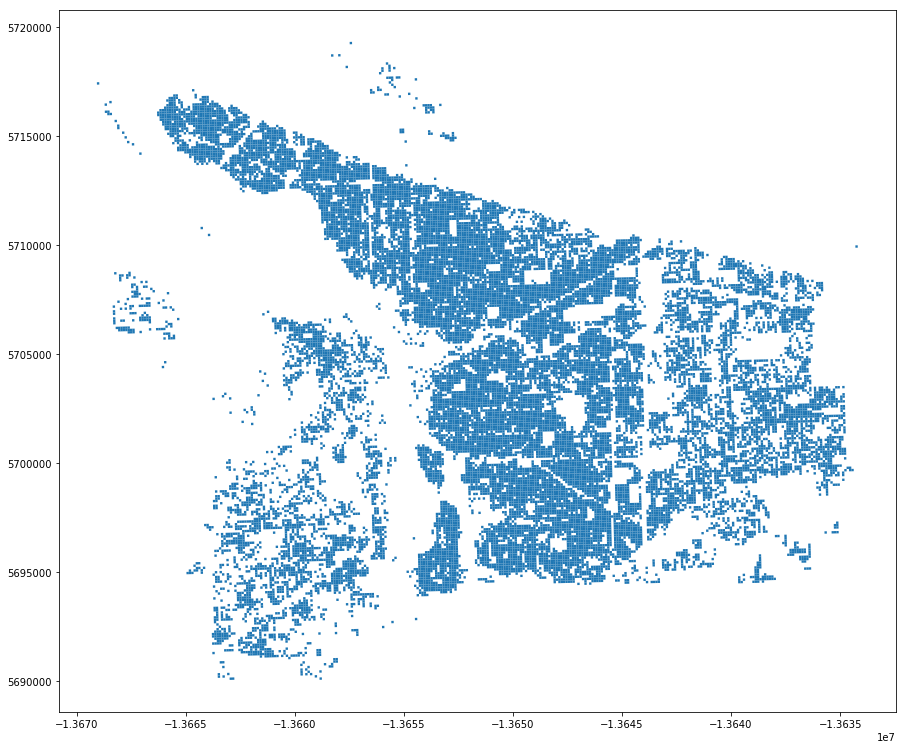

In [10]:
keep = mesh[mesh['Total_Exis'] > 4]
keep.plot(figsize=(15,15))

In [11]:
keep.to_file('../.data/mesh_4.geojson', driver='GeoJSON')

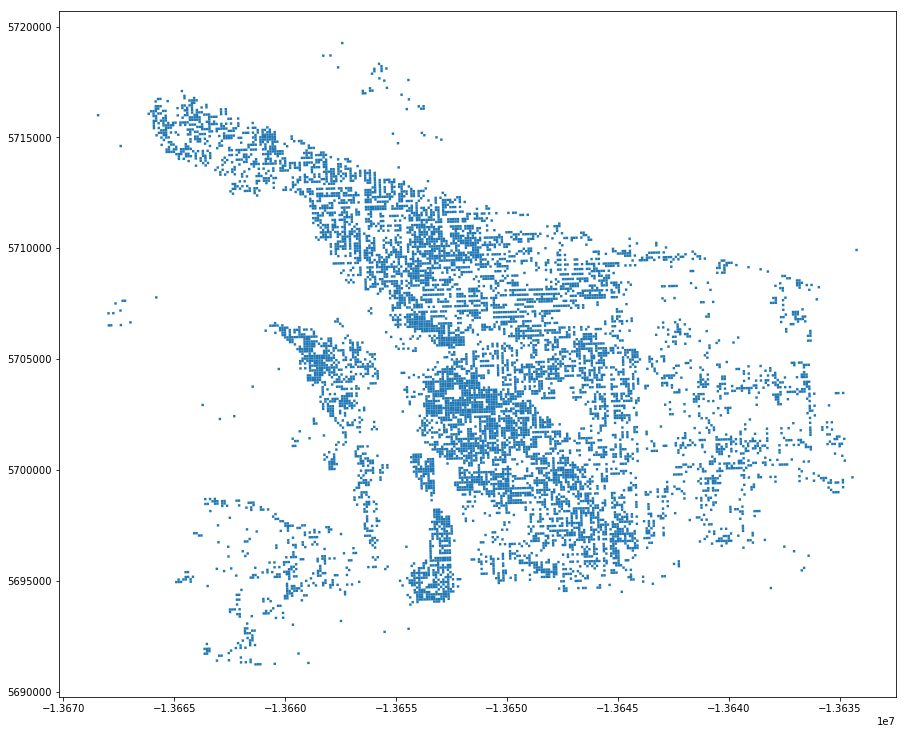

In [3]:
keep = mesh[mesh['Total_Exis'] > 8]
keep.plot(figsize=(15,15))

In [4]:
keep.to_file('../.data/mesh_8.geojson', driver='GeoJSON')

## Filtering the mesh by zoning codes

In [5]:
zoning = gpd.read_file('https://opendata.arcgis.com/datasets/6b26f2ccb71d431f9ce8f34fd8ec1558_16.geojson')
zoning.head()

OBJECTID ZONE  CMP OVRLY CMPOVR PLDIST  HIST CONSV  NRMP UNINC  ...  \
0         1   CL   IS  None   None   None  None  None  None     Y  ...   
1         2   CL   OS  None   None   None  None  None  None     Y  ...   
2         3   CL   OS  None   None   None  None  None  None     Y  ...   
3         4   CL  R10  None   None   None  None  None  None     Y  ...   
4         5   CL  R10  None   None   None  None  None  None     Y  ...   

                   CMP_DESC  OVRLY_DESC PLDIST_DESC HIST_DESC CONSV_DESC  \
0      Industrial Sanctuary        None        None      None       None   
1                Open Space        None        None      None       None   
2                Open Space        None        None      None       None   
3  Single - Dwelling 10,000        None        None      None       None   
4  Single - Dwelling 10,000        None        None      None       None   

  NRMP_DESC MAPLABEL CMPDIFFER CMPOVR_DESC  \
0      None   CL(IS)         Y        None   
1      None   CL(OS)         Y        None   
2      None   CL(OS)         Y        None   
3      None  CL(R10)         Y        None   
4      None  CL(R10)         Y        None   

                                            geometry  
0  POLYGON ((-122.6156378692739 45.46157740359878...  
1  POLYGON ((-122.6529313124114 45.45829959691451...  
2  POLYGON ((-122.6066236481986 45.4612337016146,...  
3  POLYGON ((-122.5634589717726 45.4612088446831,...  
4  POLYGON ((-122.5649339884011 45.46125380906285...  

[5 rows x 23 columns]

In [17]:
groups = zoning.groupby(['CMP', 'CMP_DESC'])

In [18]:
for n,v in groups:
    print(n)

('CX', 'Central Commercial')
('EX', 'Central Employment')
('IC', 'Institutional Campus')
('IS', 'Industrial Sanctuary')
('MDP', 'Manufactured Dwelling Park')
('ME', 'Mixed Employment')
('MU-C', 'Mixed Use - Civic Corridor')
('MU-D', 'Mixed Use - Dispersed')
('MU-N', 'Mixed Use - Neighborhood')
('MU-U', 'Mixed Use - Urban Center')
('OS', 'Open Space')
('R1', 'Multi - Dwelling 1,000')
('R10', 'Single - Dwelling 10,000')
('R2', 'Multi - Dwelling 2,000')
('R2.5', 'Single - Dwelling 2,500')
('R20', 'Single - Dwelling 20,000')
('R3', 'Multi - Dwelling 3,000')
('R5', 'Single - Dwelling 5,000')
('R7', 'Single - Dwelling 7,000')
('RF', 'Single - Dwelling Residential Farm / Forest')
('RH', 'High - Density Multi - Dwelling')
('RX', 'Central Residential')


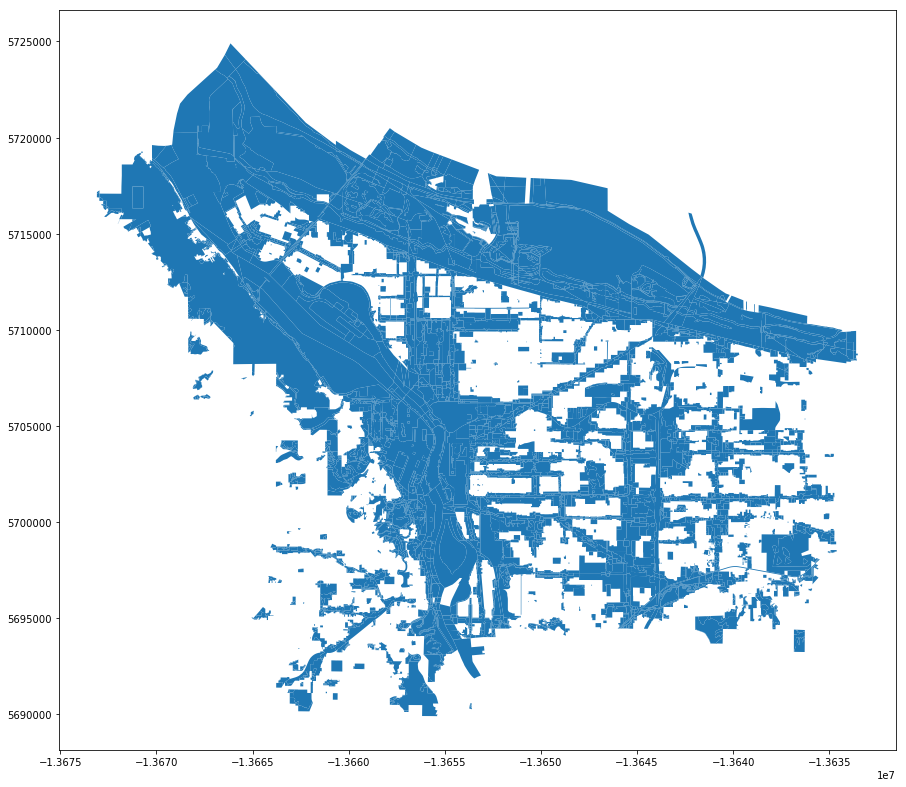

In [21]:
zoning = zoning[~zoning['CMP'].isin(['R5', 'R7', 'R10', 'R20', 'RF'])]
zoning = zoning.to_crs(epsg='3857')
zoning.plot(figsize=(15,15))

In [22]:
mesh['centroid'] = mesh['geometry'].centroid

In [23]:
zoned_mesh = gpd.sjoin(mesh, zoning, how='inner', op='within')
zoned_mesh.head()

/opt/conda/lib/python3.7/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


OBJECTID_left  Total_Exis  \
82             83           0   
83             84           0   
84             85           0   
85             86           0   
86             87           0   

                                             geometry  \
82  POLYGON ((-13656154.28458076 5689919.986138182...   
83  POLYGON ((-13656045.91174078 5689922.913843977...   
84  POLYGON ((-13655937.53883049 5689925.840240484...   
85  POLYGON ((-13655829.16584993 5689928.765327707...   
86  POLYGON ((-13655720.79279912 5689931.68910564,...   

                                        centroid  index_right  OBJECTID_right  \
82  POINT (-13656101.55718904 5689975.816681417)         6010            6011   
83  POINT (-13655993.18366143 5689978.743767722)         6010            6011   
84  POINT (-13655884.81006353 5689981.669544726)         6010            6011   
85  POINT (-13655776.43639536 5689984.594012428)         6010            6011   
86  POINT (-13655668.06265696 5689987.517170823)         6010            6011   

   ZONE CMP OVRLY CMPOVR  ...   ZONE_DESC    CMP_DESC  \
82   OS  OS     p   None  ...  Open Space  Open Space   
83   OS  OS     p   None  ...  Open Space  Open Space   
84   OS  OS     p   None  ...  Open Space  Open Space   
85   OS  OS     p   None  ...  Open Space  Open Space   
86   OS  OS     p   None  ...  Open Space  Open Space   

                  OVRLY_DESC PLDIST_DESC HIST_DESC  CONSV_DESC  NRMP_DESC  \
82  Environmental Protection        None      None        None       None   
83  Environmental Protection        None      None        None       None   
84  Environmental Protection        None      None        None       None   
85  Environmental Protection        None      None        None       None   
86  Environmental Protection        None      None        None       None   

   MAPLABEL CMPDIFFER CMPOVR_DESC  
82      OSp         N        None  
83      OSp         N        None  
84      OSp         N        None  
85      OSp         N        None  
86      OSp         N        None  

[5 rows x 27 columns]

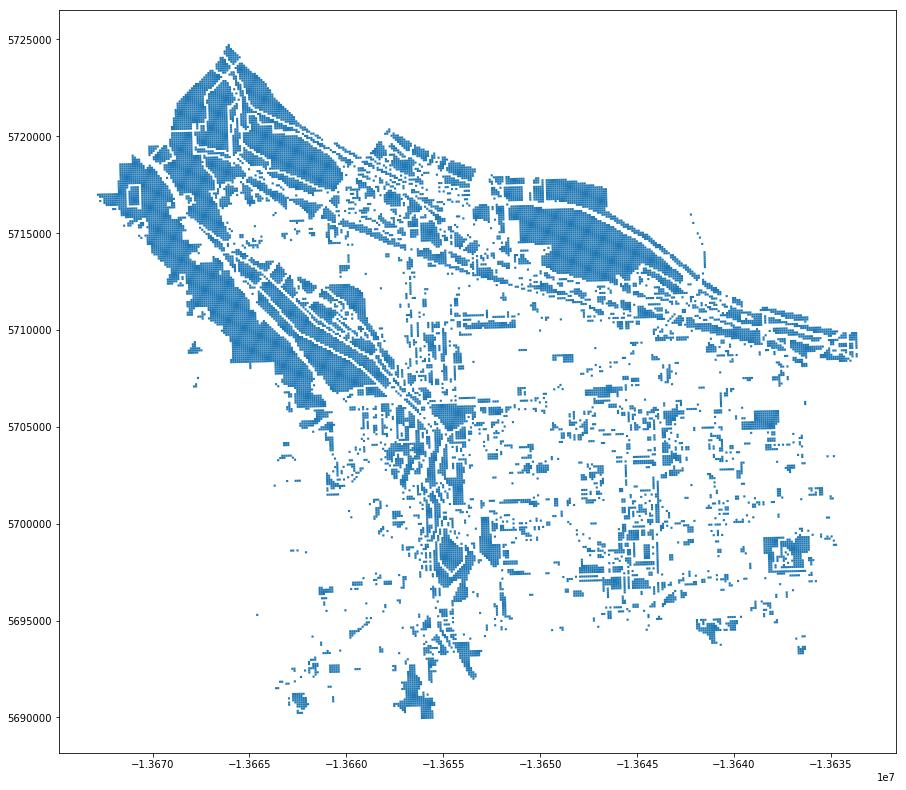

In [24]:
zoned_mesh.plot(figsize=(15,15))

In [8]:
import pandas as pd
frames = [keep, zoned_mesh]
result = pd.concat(frames)

NameError: name 'zoned_mesh' is not defined

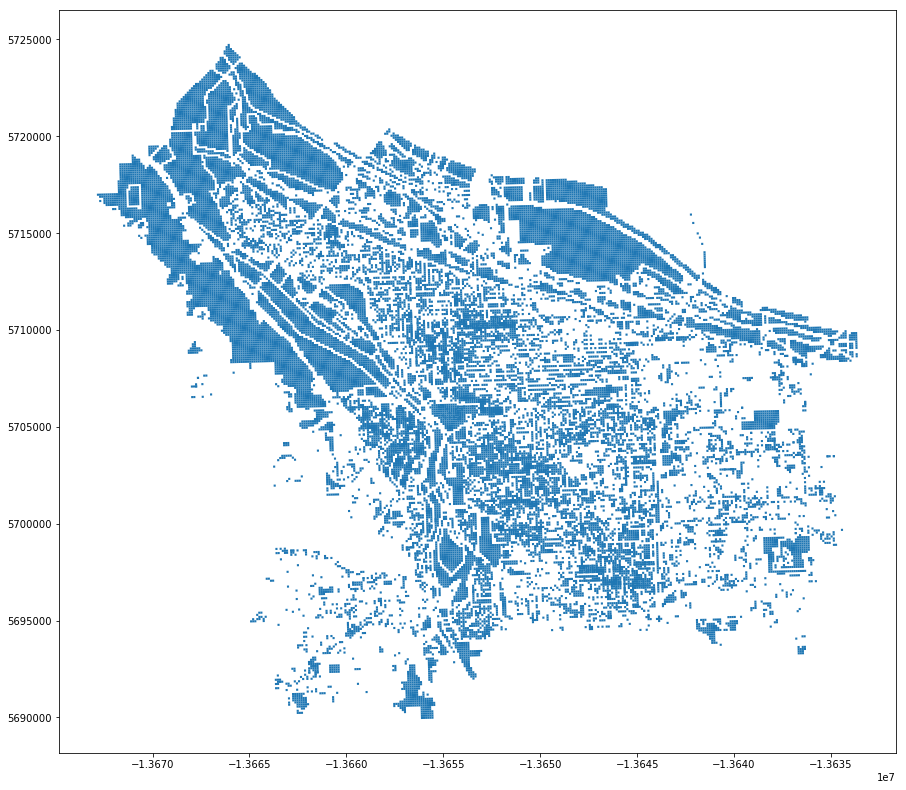

In [26]:
result.plot(figsize=(15,15))

In [27]:
result.columns.to_list()

['CMP',
 'CMPDIFFER',
 'CMPOVR',
 'CMPOVR_DESC',
 'CMP_DESC',
 'CONSV',
 'CONSV_DESC',
 'HIST',
 'HIST_DESC',
 'MAPLABEL',
 'NRMP',
 'NRMP_DESC',
 'OBJECTID',
 'OBJECTID_left',
 'OBJECTID_right',
 'OVRLY',
 'OVRLY_DESC',
 'PLDIST',
 'PLDIST_DESC',
 'Shape_Area',
 'Shape_Length',
 'Total_Exis',
 'UNINC',
 'ZONE',
 'ZONE_DESC',
 'centroid',
 'geometry',
 'index_right']

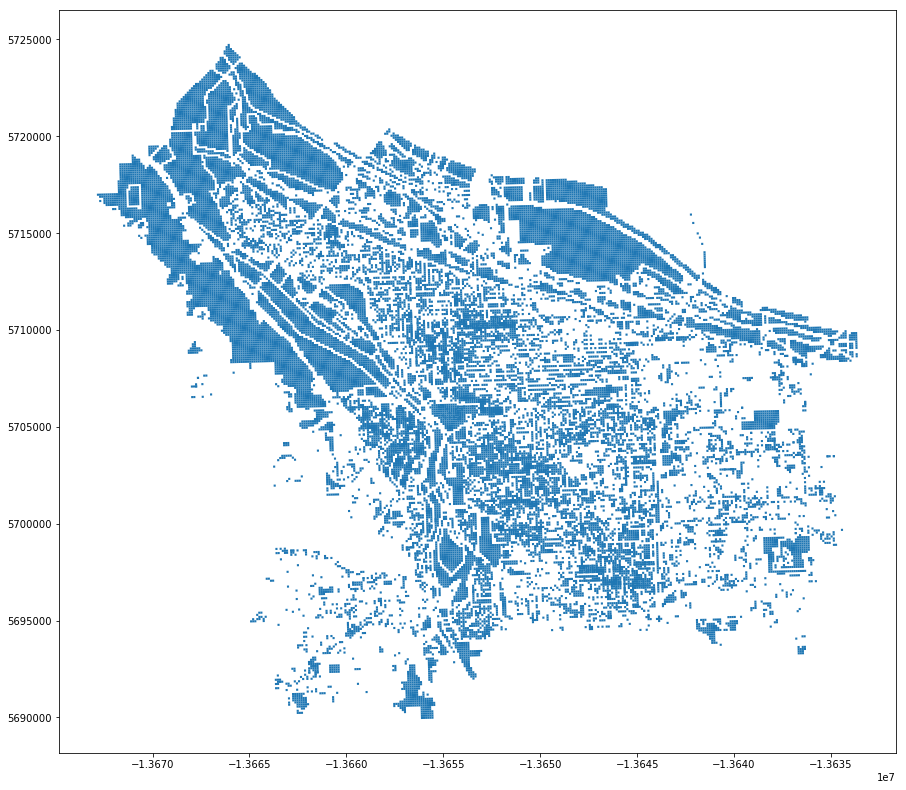

In [28]:
result = result[['geometry']]
result = result.to_crs(epsg=4326)
result.plot(figsize=(15,15))

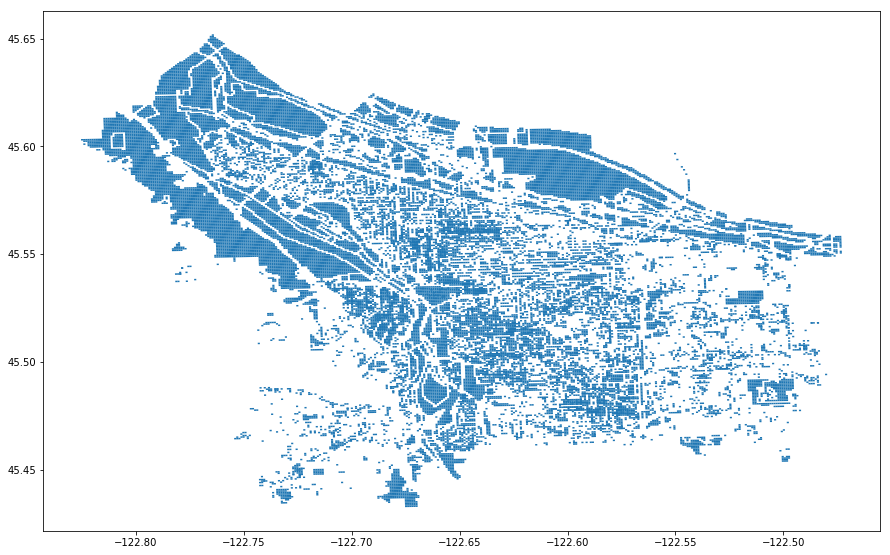

In [29]:
result.crs = {'init': 'epsg:3857', 'no_defs': True}
result = result.to_crs(epsg=4326)
result.plot(figsize=(15,15))

In [30]:
result.to_file('../.data/mesh.geojson', driver='GeoJSON')

In [31]:
mesh_centroid = result[['geometry']]
mesh_centroid.head()

geometry
1114  POLYGON ((-122.7223980573999 45.44083825605536...
1115  POLYGON ((-122.7214244058607 45.44085711132865...
1116  POLYGON ((-122.720450753676 45.44087595834148,...
1122  POLYGON ((-122.7146088270298 45.44098886694763...
1136  POLYGON ((-122.7009775748755 45.44125116388251...

In [32]:
mesh_centroid['geometry'] = mesh_centroid['geometry'].centroid
mesh_centroid.head()

geometry
1114  POINT (-122.7219246238574 45.44119039666116)
1115  POINT (-122.7209509661329 45.44120924791613)
1116   POINT (-122.719977307763 45.44122809091058)
1122   POINT (-122.7141353440081 45.4413409754054)
1136  POINT (-122.7005040052852 45.44160321607301)

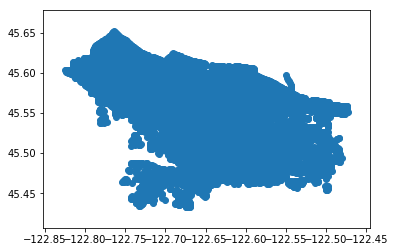

In [33]:
mesh_centroid.plot()

In [34]:
mesh_centroid.to_file('../.data/mesh_centroid.geojson', driver='GeoJSON')

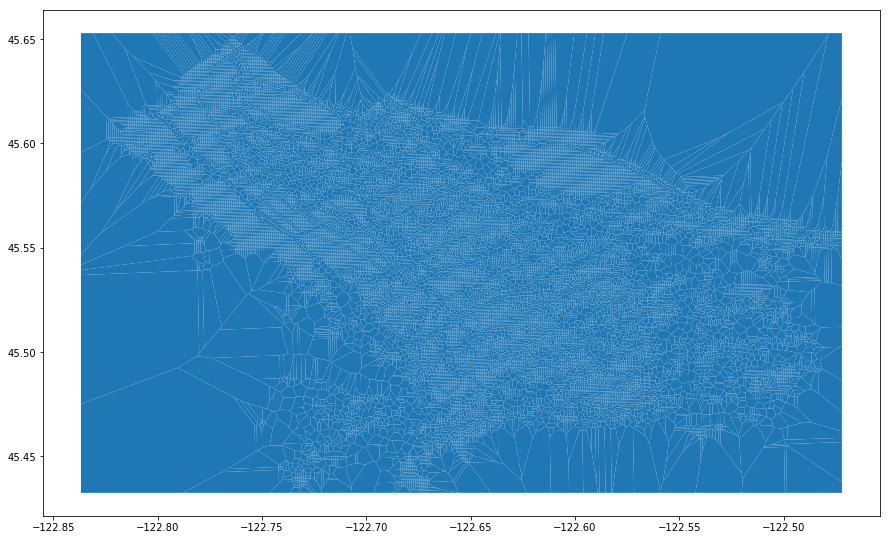

In [6]:
mesh_voronoi = gpd.read_file('../.data/mesh_voronoi.geojson')
mesh_voronoi.plot(figsize=(15,15))

In [9]:
import json

with open('../.config/connection_strings.json') as json_file:
    data = json.load(json_file)

if data is not None:
    connection_string = data['scooter_pilot_1']
    
from sqlalchemy import create_engine

engine = create_engine(connection_string)

sql = """
select t.key as tripkey
,cs.date as startdate
,t.starttime
,ce.date as enddate
,t.endtime
,t.startx
,t.starty
,t.endx
,t.endy
from fact.trip as t
inner join dim.calendar as cs on cs.key = t.startdatekey
inner join dim.calendar as ce on ce.key = t.enddatekey
"""

trips = pd.read_sql(sql, engine)

In [10]:
from shapely.geometry import Point
trips['origin'] = list(zip(trips.startx, trips.starty))
trips['origin'] = trips['origin'].apply(Point)
trips['destination'] = list(zip(trips.endx, trips.endy))
trips['destination'] = trips['destination'].apply(Point)

In [12]:
origins_with_cell = gpd.sjoin(trips.set_geometry('origin'), mesh_voronoi, how="inner", op='intersects')
destinations_with_cell = gpd.sjoin(trips.set_geometry('destination'), mesh_voronoi, how="inner", op='intersects') 

/opt/conda/lib/python3.7/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


In [13]:
origin_cell_counts = origins_with_cell[['tripkey', 'index_right']].groupby(['index_right'])
destination_cell_counts = destinations_with_cell[['tripkey', 'index_right']].groupby(['index_right'])

cells_origin_counts = pd.merge(mesh_voronoi, origin_cell_counts.count(), left_index=True, right_on='index_right').rename(index=str, columns={'tripkey': 'trips'})
cells_destination_counts = pd.merge(mesh_voronoi, destination_cell_counts.count(), left_index=True, right_on='index_right').rename(index=str, columns={'tripkey': 'trips'})

(-122.7, -122.65, 45.5, 45.55)

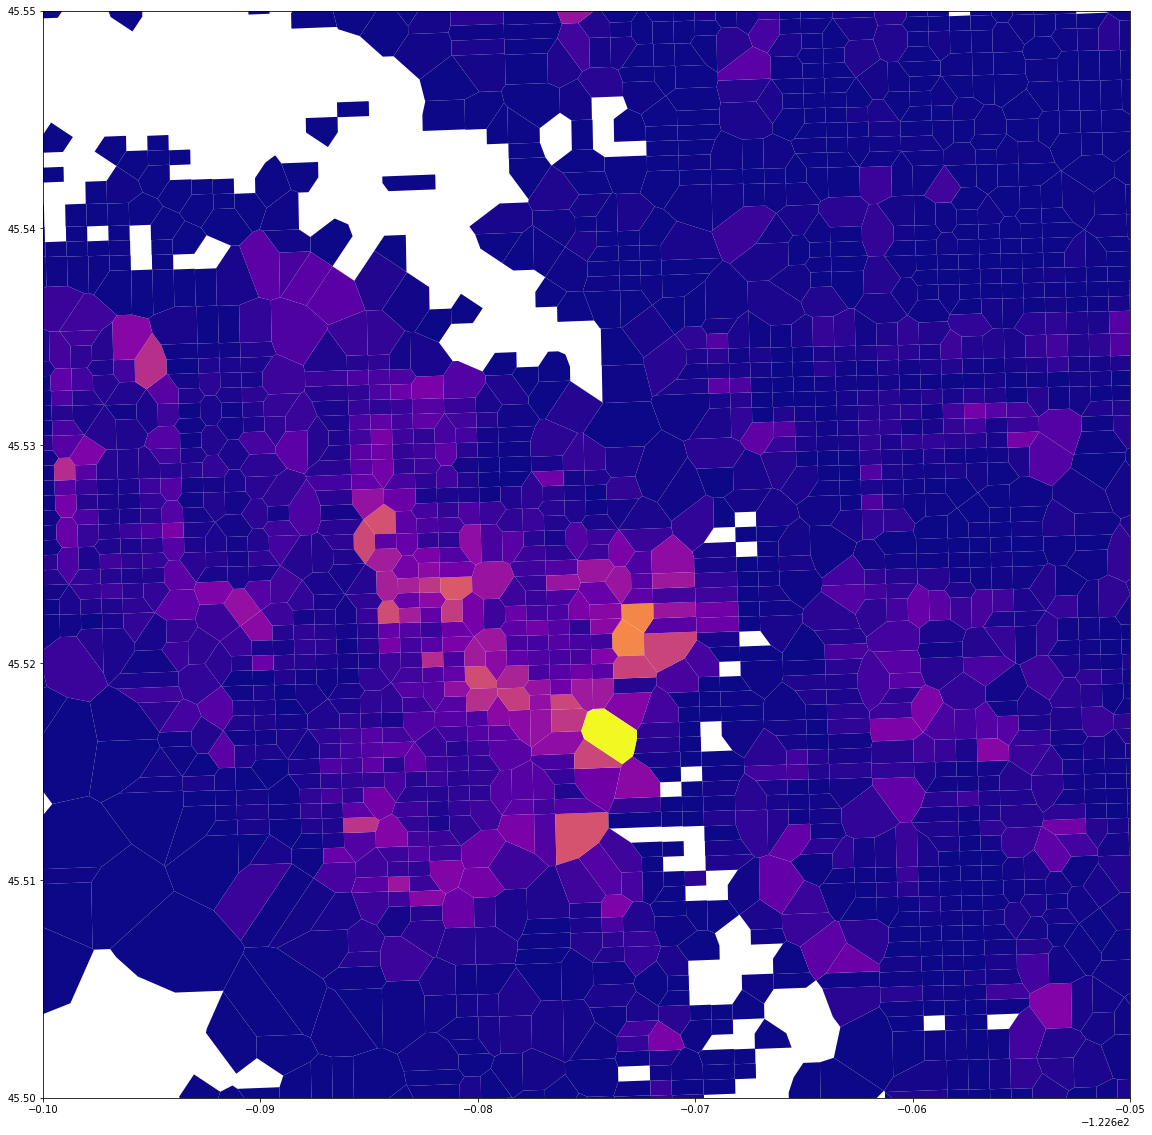

In [14]:
import matplotlib.pyplot as plt

cells_origin_counts.plot(figsize=(20,20), column='trips', cmap='plasma')
plt.axis((-122.7,-122.65, 45.5, 45.55))

(-122.7, -122.65, 45.5, 45.55)

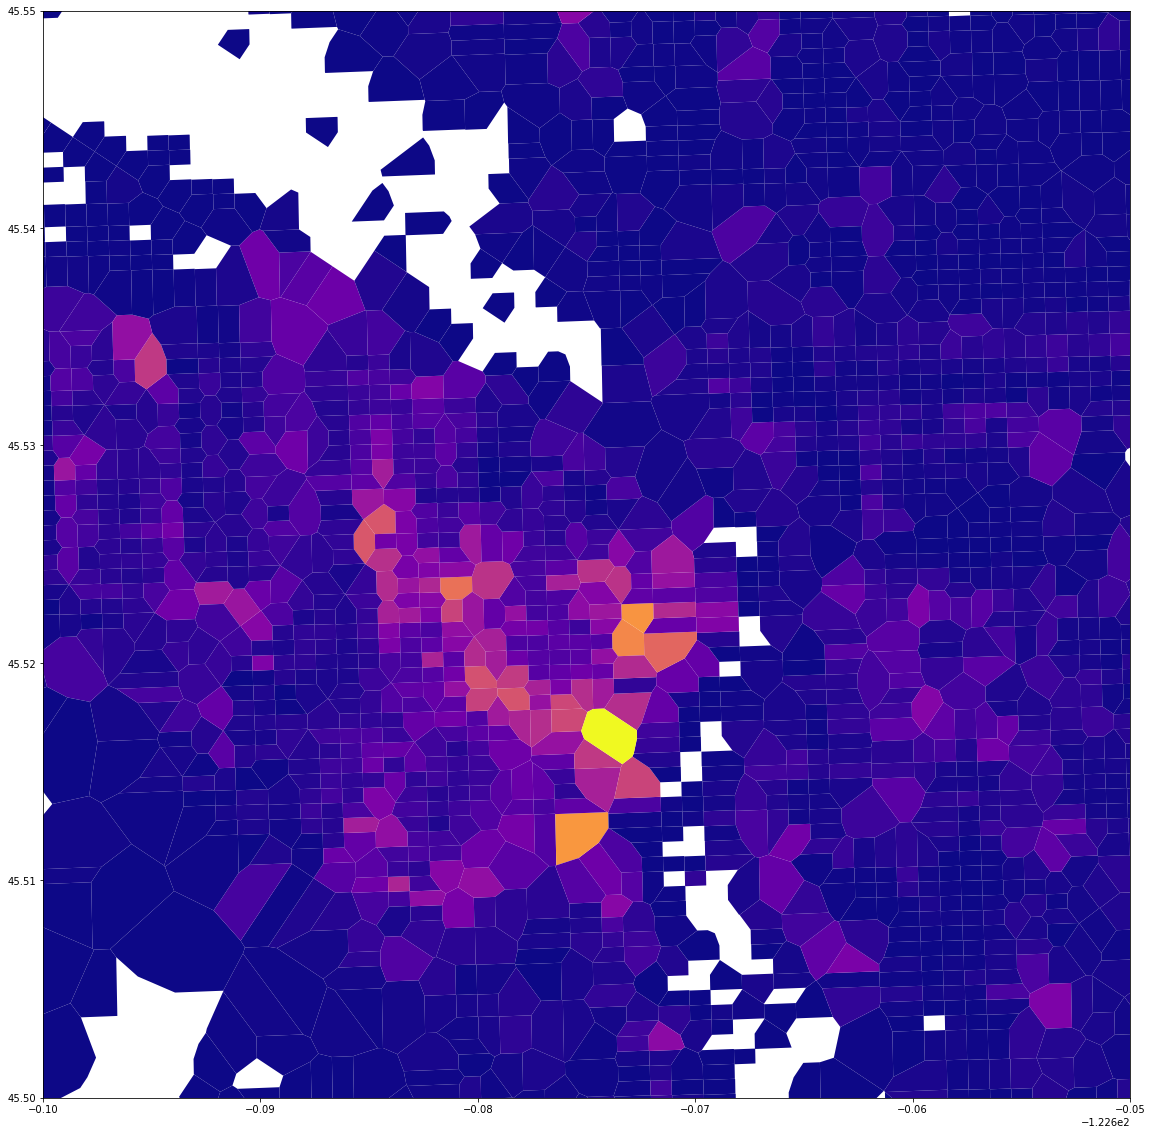

In [15]:
cells_destination_counts.plot(figsize=(20,20), column='trips', cmap='plasma')
plt.axis((-122.7,-122.65, 45.5, 45.55))

In [16]:
cells_origin_counts.to_file('../.data/mesh_voronoi_origin_counts.geojson', driver='GeoJSON')
cells_destination_counts.to_file('../.data/mesh_voronoi_destination_counts.geojson', driver='GeoJSON')

In [19]:
trips.set_geometry('origin')[['origin']].to_file('../.data/raw_origins.geojson', driver='GeoJSON')
trips.set_geometry('destination')[['destination']].to_file('../.data/raw_destinations.geojson', driver='GeoJSON')

tripkey                  int64
startdate               object
starttime      timedelta64[ns]
enddate                 object
endtime        timedelta64[ns]
startx                 float64
starty                 float64
endx                   float64
endy                   float64
origin                  object
destination             object
dtype: object